# Hypotesis Testing for Data Science

In [1]:
import numpy as np

### One-Sample T-Tests in Scipy

One-sample t-tests are used for comparing a sample average to a hypothetical population average. For example, a one-sample t-test might be used to address questions such as:

- Is the average amount of time that visitors spend on a website different from 5 minutes?

- Is the average amount of money that customers spend on a purchase more than 10 USD?

In [2]:
prices = np.genfromtxt("./csv/prices.csv")
prices

array([ 978., 1080.,  999.,  855., 1105.,  961.,  899., 1061.,  880.,
       1455.,  505.,  936., 1024.,  982.,  840.,  930.,  829.,  504.,
        955., 1380., 1361., 1130.,  946.,  973., 1076., 1131.,  810.,
        734., 1275.,  867.,  962.,  865.,  709., 1216.,  735.,  768.,
        757., 1060.,  715.,  839.,  999., 1259., 1194., 1082., 1129.,
       1255.,  931., 1236.,  921.,  907.])

In [3]:
prices_mean = np.mean(prices)
prices_mean

980.0

#### Implementing a One-Sample T-Test


We inspected a sample of 50 purchase prices at BuyPie and saw that the average was 980 Rupees. Suppose that we want to run a one-sample t-test with the following null and alternative hypotheses:

- Null: The average cost of a BuyPie order is 1000 Rupees
- Alternative: The average cost of a BuyPie order is not 1000 Rupees.

In [4]:
from scipy.stats import ttest_1samp # SciPy has a function called ttest_1samp(), which performs a one-sample t-test for you.


P-values are probabilities, so they should be between 0 and 1. This p-value is the probability of observing an average purchase price less than 980 OR more than 1020 among a sample of 50 purchases. If you run the test correctly, you should see a p-value of 0.49 or 49%.

In [5]:
print("mean of prices: " + str(prices_mean))
tstat, pval = ttest_1samp(prices, 1000)
pval

mean of prices: 980.0


0.4920744804182786

#### Assumptions of a One Sample T-Test

When running any hypothesis test, it is important to know and verify the assumptions of the test. The assumptions of a one-sample t-test are as follows:

- The sample was randomly selected from the population
- The individual observations were independent
- The data is normally distributed without outliers OR the sample size is large (enough)

In general, if you run an experiment that violates (or possibly violates) one of these assumptions, you can still run the test and report the results — but you should also report assumptions that were not met and acknowledge that the test results could be flawed.


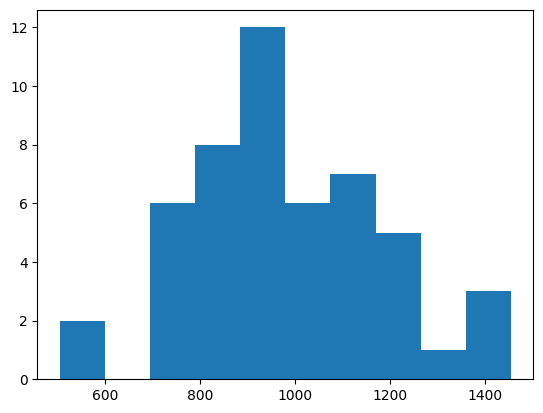

In [6]:
import matplotlib.pyplot as plt
plt.hist(prices)
plt.show()

The values are (approximately) normally distributed.

### Simulating a Binomial Test

Binomial tests are similar to one-sample t-tests in that they test a sample statistic against some population-level expectation. The difference is that:

- binomial tests are used for binary categorical data to compare a sample frequency to an expected population-level probability
- one-sample t-tests are used for quantitative data to compare a sample mean to an expected population mean.

In [7]:
import pandas as pd

monthly_report = pd.read_csv("./csv/monthly_report.csv")
monthly_report.head()

,timestamp,purchase,item
0,2020-01-17 17:23:06,y,cue cards - love actually
1,2020-01-25 17:09:39,n,NaN
2,2020-01-25 05:22:01,n,NaN
3,2020-01-18 04:33:40,y,t-rex - jurassic park
4,2020-01-24 17:24:52,n,NaN


#### Summarizing the Sample

In [8]:
sample_size = len(monthly_report)
print('sample size:')
sample_size

sample size:


500

In [9]:
num_purchased = np.sum(monthly_report.purchase == 'y')
print("number of purchases:")
num_purchased

number of purchases:


41

#### Simulating Randomness

In [10]:
#simulate one visitor:
one_visitor = np.random.choice(["y", "n"], size = 1, p=[0.1, 0.9])
one_visitor

array(['n'], dtype='<U1')

In [11]:
#simulate 500 visitors:
simulated_monthly_visitors = np.random.choice(["y", "n"], size = 500, p=[0.1, 0.9])
simulated_monthly_visitors


array(['n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'y', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'y', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'y', 'n', 'y', 'n', 'y', 'n', 'y', 'n', 'n',
       'n', 'n', 'n', 'n', 'y', 'n', 'n', 'y', 'n', 'n', 'y', 'n', 'n',
       'y', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'n', 'n', 'n', 'y',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'n', 'y', 'n',
       'n', 'y', 'n', 'y', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'y', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'y', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n

#### Simulating the Null Distribution


In [12]:
num_purchased = np.sum(simulated_monthly_visitors == "y")
print(num_purchased)

50


Use a for-loop to repeat this process 10000 times. Each time, append the number of simulated visitors who made a purchase to the list `null_outcomes`

In [13]:
null_outcomes = []

for i in range(10000):
  simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])

  num_purchased = np.sum(simulated_monthly_visitors == 'y')

  null_outcomes.append(num_purchased)

null_min = np.min(null_outcomes) 
print(null_min) 

null_max = np.max(null_outcomes)
print(null_max)


25
77


#### Inspecting the Null Distribution


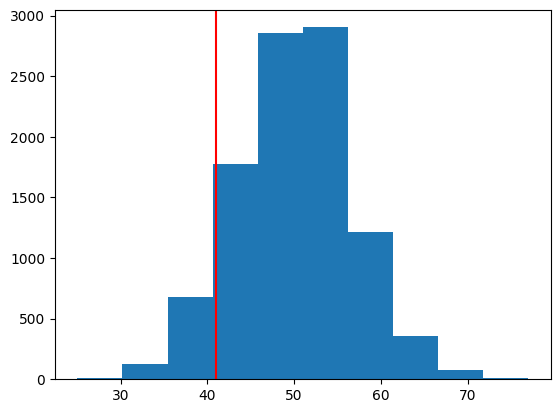

In [14]:
plt.hist(null_outcomes)
plt.axvline(41, color = 'r')
plt.show()

#### Confidence Intervals
So far, we’ve inspected the null distribution and calculated the minimum and maximum values. While the number of purchases in each simulated sample ranged roughly from 25 to 75 by random chance, upon further inspection of the distribution, we saw that those extreme values happened very rarely.

In [15]:
null_90CI = np.percentile(null_outcomes, [5,95])
print(null_90CI)

[39. 61.]


#### Calculating a One-Sided P-Value

P-value calculations and interpretations depend on the alternative hypothesis of a test, a description of the difference from expectation that we are interested in.

For example, let’s return to the 10-coin-flip example from earlier. Suppose that we flipped a coin 10 times and observed only 2 heads. We might run a hypothesis test with the following null and alternative hypotheses:

- Null: the probability of heads is 0.5
- Alternative: the probability of heads is less than 0.5

In [16]:
null_outcomes = np.array(null_outcomes)
p_value = np.sum(null_outcomes <= 41)/len(null_outcomes) 
print(p_value)

0.1056


#### Calculating a Two-Sided P-Value

In the previous block, we calculated a one-sided p-value. In this exercise, we’ll estimate a p-value for a 2-sided test, which is the default setting for many functions in Python (and other languages, like R!).

Calculate the proportion of values in null_outcomes that are less than or equal to 41 (the number of purchases we observed in our sample, which is 9 fewer than 50) OR greater than or equal to 59 (which is 9 purchases more than 50).

In [17]:
null_outcomes = np.array(null_outcomes)
p_value = np.sum((null_outcomes <= 41) | (null_outcomes >= 59))/len(null_outcomes) 
print(p_value)

0.2117


#### Writing a Binomial Test Function

In [18]:
from scipy.stats import binomtest

def simulation_binomial_test(observed_successes, n, p):
  #initialize null_outcomes
  null_outcomes = []
  
  #generate the simulated null distribution
  for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[p, 1-p])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

  #calculate a 1-sided p-value
  null_outcomes = np.array(null_outcomes)
  p_value = np.sum(null_outcomes <= observed_successes)/len(null_outcomes) 
  
  #return the p-value
  return p_value

#Test your function below by uncommenting the code below. You should see that your simulation function gives you a very similar answer to the binom_test function from scipy:

p_value1 = simulation_binomial_test(45, 500, .1)
print("simulation p-value: ", p_value1)

p_value2 = binomtest(45, 500, .1, alternative = 'less')
print("binom_test p-value: ", p_value2)

simulation p-value:  0.2445
binom_test p-value:  BinomTestResult(k=45, n=500, alternative='less', statistic=0.09, pvalue=0.2546892605623419)


#### Binomial Testing with SciPy


In [19]:
p_value_2sided = binomtest(41, 500, .1)
print(p_value_2sided)

p_value_1sided = binomtest(41, 500, .1, alternative = 'less')
print(p_value_1sided)

BinomTestResult(k=41, n=500, alternative='two-sided', statistic=0.082, pvalue=0.20456397700682577)
BinomTestResult(k=41, n=500, alternative='less', statistic=0.082, pvalue=0.10011352697567105)
